# Hotel Booking Demand

This dataset is from Kaggle - Hotel booking demand.

Have you ever wondered which time of the year has the highest demand of hotel booking? Or are you a hotel/resort owener who wants to know the consumption habit of the guests? This dataset provides us with the data including the time of arriving/leaving, duration of the staying, etc.

We will explore this dataset with Python Numpy/Pandas and visualize the results using Matplotlib/Seaborn/Plotly. 

## Downloading the Dataset

Download the dataset from Kaggle using opendatasets library

In [415]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [416]:
dataset_url = 'https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand' 

In [417]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./hotel-booking-demand" (use force=True to force download)


The dataset has been downloaded and extracted.

In [418]:
data_dir = './hotel-booking-demand'

In [419]:
import os
os.listdir(data_dir)

['hotel_bookings.csv']

Let us save and upload our work to Jovian before continuing.

In [420]:
project_name = "zerotopandas-course-project" # change this (use lowercase letters and hyphens only)

In [421]:
!pip install jovian --upgrade -q

In [422]:
import jovian

In [423]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sashalai007/zerotopandas-course-project" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/sashalai007/zerotopandas-course-project


'https://jovian.com/sashalai007/zerotopandas-course-project'

## Data Preparation and Cleaning

We will understand some brief information about this dataset by getting concise summary, finding missing data, etc., and finally cleaning the dataset.



In [424]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [425]:
df = pd.read_csv('./hotel-booking-demand/hotel_bookings.csv')
pd.options.display.max_columns = None
display(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [427]:
#check for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Drop data with mistaken guests

In [428]:
#drop data with no guests or no adults
no_guests = list(df.loc[df.adults + df.children + df.babies == 0].index)
no_adults = list(df.loc[df.adults == 0].index)

In [429]:
df.drop(df.index[list(set(no_guests + no_adults))], inplace = True)
df.shape

(118987, 32)

### Convert time string to datetime

In [430]:
#convert 'arrival_date' to datetime
arrival_date = df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].copy()
arrival_date.columns = ['year', 'month', 'day']
month_map = {
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}

arrival_date['month'] = arrival_date.month.replace(month_map)
arrival_date = pd.to_datetime(arrival_date)
df.insert(loc = 7 , column = 'arrival_date', value = arrival_date) 

In [431]:
#convert 'reservation_date' to datetime
reservation_date = pd.to_datetime(df.reservation_status_date)

In [432]:
#add additional information to the df
df['reservation_date_year'] = pd.DatetimeIndex(df.reservation_status_date).year
df['reservation_date_month'] = pd.DatetimeIndex(df.reservation_status_date).month
df['reservation_date_day'] = reservation_date.dt.day
#df = df.drop(['reservation_status_date'], axis = 1)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_date_year,reservation_date_month,reservation_date_day
0,Resort Hotel,0,342,2015,July,27,1,2015-07-01,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,2015-07-01,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,7,1
2,Resort Hotel,0,7,2015,July,27,1,2015-07-01,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,7,2
3,Resort Hotel,0,13,2015,July,27,1,2015-07-01,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,2015-07-01,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2017-08-30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017,9,6
119386,City Hotel,0,102,2017,August,35,31,2017-08-31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017,9,7
119387,City Hotel,0,34,2017,August,35,31,2017-08-31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017,9,7
119388,City Hotel,0,109,2017,August,35,31,2017-08-31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017,9,7


### Seperate city hotel and resort hotel

In [433]:
rh_df = df[df.hotel == 'Resort Hotel']
ch_df = df[df.hotel == 'City Hotel']

In [434]:
import jovian

In [479]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sashalai007/zerotopandas-course-project" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/sashalai007/zerotopandas-course-project


'https://jovian.com/sashalai007/zerotopandas-course-project'

## Exploratory Analysis and Visualization

We will explore and visualize some of the information we hope to know.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [436]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Statistics of numeric columns

In [437]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_date_year,reservation_date_month,reservation_date_day
count,118987.000000,118987.000000,118987.000000,118987.000000,118987.000000,118987.00000,118987.000000,118987.000000,118983.000000,118987.000000,118987.000000,118987.000000,118987.000000,118987.000000,102724.000000,6766.000000,118987.000000,118987.000000,118987.000000,118987.000000,118987.000000,118987.000000,118987.00000
mean,0.370755,104.070537,2016.156362,27.164144,15.796768,0.92695,2.499046,1.862691,0.100435,0.007950,0.031550,0.087337,0.137343,0.218528,86.888371,189.133461,2.325565,102.008076,0.062654,0.570642,2016.093506,6.333381,15.66556
std,0.483009,106.890775,0.707742,13.598809,8.781186,0.99527,1.897763,0.570060,0.390222,0.097473,0.174799,0.845693,1.499527,0.638088,110.846868,131.585964,17.614198,50.448822,0.245544,0.792400,0.715641,3.345472,8.77882
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014.000000,1.000000,1.00000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.500000,0.000000,0.000000,2016.000000,3.000000,8.00000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.00000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,178.000000,0.000000,95.000000,0.000000,0.000000,2016.000000,6.000000,16.00000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.00000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017.000000,9.000000,23.00000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.00000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017.000000,12.000000,31.00000


### Home countries of guests
We will explore the home countries of guests from the data given.

In [438]:
country_count = df.country.value_counts()

country_values = list(country_count)
country_labels = list(country_count.index)

In [439]:
#visualizeusing pie chart
fig = px.pie(country_labels, values = country_values, names = country_labels, title = "Home Country of Guests", template="seaborn")
fig.update_traces(textposition = "inside", textinfo = "value + percent + label")
fig.show();

The top five home country of guests are Portugal, United Kingdom, France, Spain, and Germany, with Portugal accounting for 40.9% of the total guests.

### Average of Guests Monthly
Here we will analyze the average of guests each month by resort hotels and city hotels separately.

In [440]:
#group 'hotel' by 'arrival_date_month'
rh_monthly_guests = rh_df.groupby('arrival_date_month')['hotel'].count()
ch_monthly_guests = ch_df.groupby('arrival_date_month')['hotel'].count()

#create new dataframes for both type of hotel, and them concatenating them into a new one
rh_guest_df = pd.DataFrame({
    'month': list(rh_monthly_guests.index),
    'hotel': 'Resort Hotel', 
    'guests': list(rh_monthly_guests.values)
})

ch_guest_df = pd.DataFrame({
    'month': list(ch_monthly_guests.index),
    'hotel': 'City Hotel', 
    'guests': list(ch_monthly_guests.values)
})

all_guest_data = pd.concat([rh_guest_df, ch_guest_df], ignore_index = True)

Since the dataset has given three years of information for July and August, two and a little more for Septmeber, and two years for the rest, we need the normalize the data in order to correctly calculate the average of guests for each month. 

In [441]:
#calculate monthly average
monthly_guest_data = all_guest_data.copy()

monthly_guest_data.loc[(monthly_guest_data['month'] == 'July') | (monthly_guest_data['month'] == 'August'), 'guests'] /= 3
monthly_guest_data.loc[(~(monthly_guest_data['month'] == 'July')) & (~(monthly_guest_data['month'] == 'August')) & (~(monthly_guest_data['month'] == 'September')), 'guests'] /= 2
monthly_guest_data.loc[(monthly_guest_data['month'] == 'September'), 'guests'] /= 2.23

monthly_guest_data['guests'] = np.round(monthly_guest_data['guests'], decimals = 0)

ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_guest_data['month'] = pd.Categorical(monthly_guest_data['month'], ordered_months)

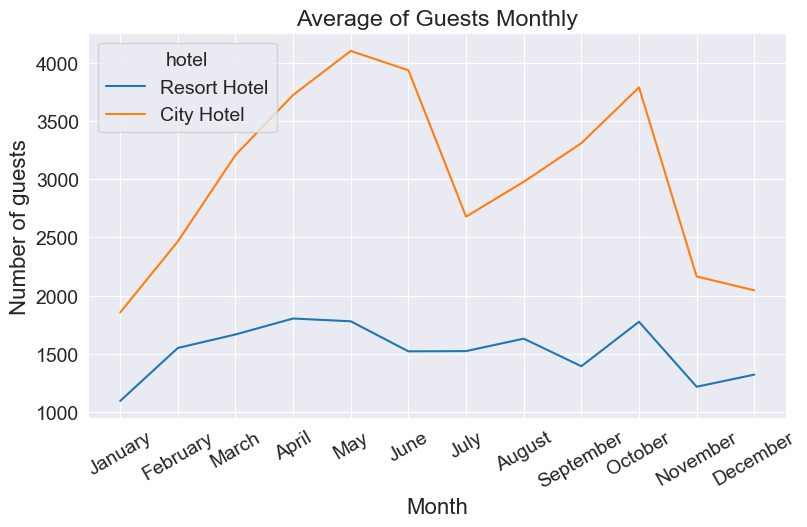

In [442]:
#visualize using line chart
sns.lineplot(x = 'month', y = 'guests', data = monthly_guest_data, hue = 'hotel')

plt.title('Average of Guests Monthly')
plt.xlabel("Month", fontsize = 16)
plt.ylabel("Number of guests", fontsize = 16)
plt.xticks(rotation = 30)
plt.show();

- City hotels have higher number of guests overall than those of resort hotels for each month . 
- Resort hotel: Resort hotels expect the most guests in April. 
- City hotels: City hotels have the most average of guests in May. 

### Nights of guests staying
We will visualize the number of nights of staying and calculate the percentage of each duration.

In [443]:
#combine'stays_in_weekend_nights' and 'stays_in_weekend_nights'
stay_time = df.loc[:, ['hotel', 'stays_in_weekend_nights', 'stays_in_week_nights']]
total_nights = stay_time.stays_in_weekend_nights + stay_time.stays_in_week_nights
stay_time['total_nights'] = total_nights
stay_time = stay_time.drop(['stays_in_weekend_nights', 'stays_in_week_nights'], axis = 1)

rh_stay = stay_time[stay_time.hotel == 'Resort Hotel']
ch_stay = stay_time[stay_time.hotel == 'City Hotel']

In [444]:
#create new dataframes for both type of hotel, and them concatenating them into a new one
rh_stay_nights = list(rh_stay.total_nights.value_counts().index)
rh_stay_bookings = list(rh_stay.total_nights.value_counts())
rh_stay_percent = (rh_stay.total_nights.value_counts() / sum(rh_stay_bookings))*100

rh_stay_df = pd.DataFrame({
    'hotel': 'Resort Hotel',
    'number_of_nights': rh_stay_nights,
    'percent_of_bookings': rh_stay_percent
})

ch_stay_nights = list(ch_stay.total_nights.value_counts().index)
ch_stay_bookings = list(ch_stay.total_nights.value_counts())
ch_stay_percent = (ch_stay.total_nights.value_counts() / sum(ch_stay_bookings))*100
ch_stay_df = pd.DataFrame({
    'hotel': 'City Hotel',
    'number_of_nights': ch_stay_nights,
    'percent_of_bookings': ch_stay_percent
})

total_stay_df = pd.concat([rh_stay_df, ch_stay_df])

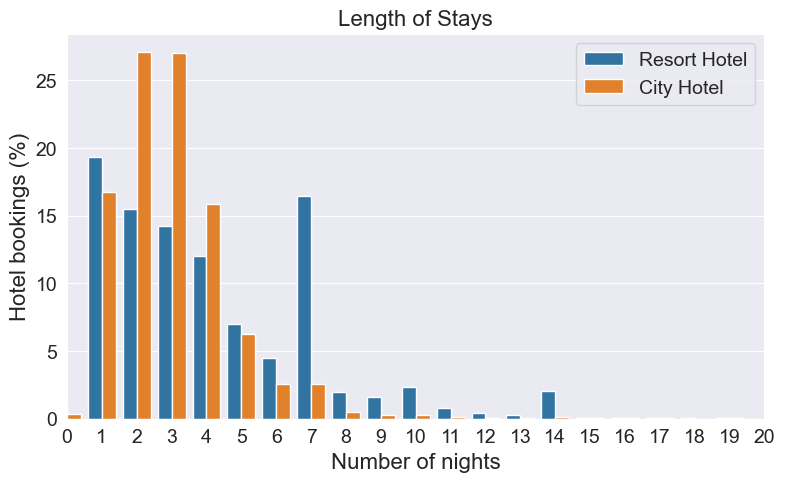

In [445]:
#visualize using bar chart
sns.barplot(x = 'number_of_nights', y = 'percent_of_bookings', hue = 'hotel', data = total_stay_df)

plt.title("Length of Stays", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Hotel bookings (%)", fontsize=16)
plt.legend(loc = "upper right")
plt.xlim(0, 20)
plt.show();

- Resort hotels: The most popular staying duration for resort hotels are 1, 2 and 7 nights.
- City hotels: The most popular staying length for city hotels are 2 and 3 nights.

### Average cost of hotel per night
Here we'll explore the average prices per night for resort/city hotels each month.


In [446]:
#define new dataframes
adr_df = df.drop(df[df.adr == 0].index).loc[:, ['hotel', 'arrival_date_month', 'adr']]
adr_df['arrival_date_month'] = pd.Categorical(adr_df['arrival_date_month'], ordered_months)

rh_adr = adr_df[stay_time.hotel == 'Resort Hotel']
ch_adr = adr_df[stay_time.hotel == 'City Hotel']

/var/folders/mf/4s6x4zmd069fb360bc_z45fh0000gn/T/ipykernel_23789/2961671465.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/mf/4s6x4zmd069fb360bc_z45fh0000gn/T/ipykernel_23789/2961671465.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [447]:
#group 'adr' by 'arrival_date_month'
rh_adr_monthly = rh_adr.groupby('arrival_date_month')['adr'].mean()
ch_adr_monthly = ch_adr.groupby('arrival_date_month')['adr'].mean()

rh_adr = pd.merge(rh_adr, rh_adr_monthly, on = 'arrival_date_month')
ch_adr = pd.merge(ch_adr, ch_adr_monthly, on = 'arrival_date_month')
rh_adr.rename(columns = {'adr_x': 'adr', 'adr_y': 'adr_monthly'}, inplace = True)
ch_adr.rename(columns = {'adr_x': 'adr', 'adr_y': 'adr_monthly'}, inplace = True)

adr_full_df = pd.concat([rh_adr, ch_adr])

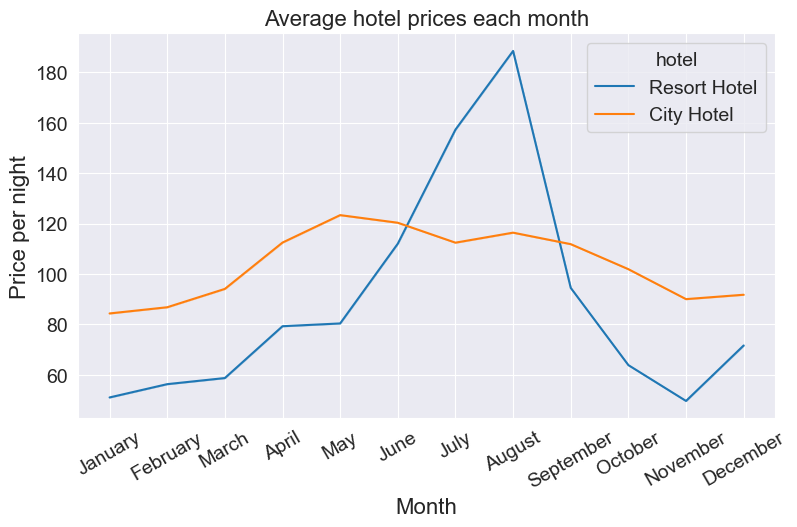

In [448]:
#visualize using line chart
sns.lineplot(x = 'arrival_date_month', y = 'adr_monthly', hue = 'hotel', data = adr_full_df)

plt.title('Average hotel prices each month', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Price per night', fontsize=16)
plt.xticks(rotation = 30)
plt.show();

- Resort hotels: July and August has a significant rise in price for resort hotels and exceeding that of city hotels from June to August.
- City hotels: Guests will have to pay more in May and June for city hotels.

### Period of time between the booking date and the arriving date
Visualizing the lead time (length of time between the booking date and the arriving date.)

In [449]:
#convert days into months
rh_month_num = [0, 0, 0, 0, 0, 0, 0]

for day in rh_df.lead_time:
    if day <= 30:
        rh_month_num[0] += 1
    elif day <= 60 & day > 30:
        rh_month_num[1] += 1
    elif day <= 90 & day > 60:
        rh_month_num[2] += 1
    elif day <= 120 & day> 90:
        rh_month_num[3] += 1
    elif day <= 150 & day > 120:
        rh_month_num[4] += 1
    elif day <= 180 & day > 150:
        rh_month_num[5] += 1
    elif day > 180:
        rh_month_num[6] += 1
        
rh_month_num = [(i/sum(rh_month_num))*100 for i in rh_month_num]

In [450]:
#convert days into months
ch_month_num = [0, 0, 0, 0, 0, 0, 0]

for day in ch_df.lead_time.items():
    if day[1] <= 30:
        ch_month_num[0] += 1
    elif day[1] <= 60 & day[1] > 30:
        ch_month_num[1] += 1
    elif day[1] <= 90 & day[1] > 60:
        ch_month_num[2] += 1
    elif day[1] <= 120 & day[1] > 90:
        ch_month_num[3] += 1
    elif day[1] <= 150 & day[1] > 120:
        ch_month_num[4] += 1
    elif day[1] <= 180 & day[1] > 150:
        ch_month_num[5] += 1
    elif day[1] > 180:
        ch_month_num[6] += 1
        
ch_month_num = [(j/sum(ch_month_num))*100 for j in ch_month_num]

In [451]:
#create new dataframes for both type of hotel, and them concatenating them into a new one
rh_leadtime_df = pd.DataFrame({
    'hotel': 'Resort Hotel', 
    'months': ['One month', 'Two months', 'Three months', 'Four months', 'Five months', 'Six months', 'Over half a year'],
    'lead_time_percentage': rh_month_num 
})

ch_leadtime_df = pd.DataFrame({
    'hotel': 'City Hotel', 
    'months': ['One month', 'Two months', 'Three months', 'Four months', 'Five months', 'Six months', 'Over half a year'],
    'lead_time_percentage': ch_month_num 
})

leadtime_full_df = pd.concat([rh_leadtime_df, ch_leadtime_df])

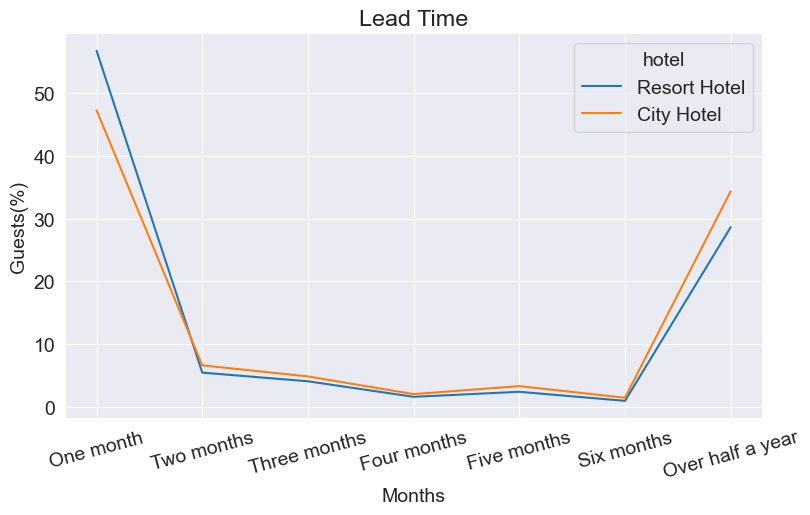

In [452]:
#visualize using line chart
sns.lineplot(x = 'months', y = 'lead_time_percentage', hue = 'hotel', data = leadtime_full_df)

plt.title('Lead Time')
plt.xlabel('Months')
plt.ylabel('Guests(%)')
plt.xticks(rotation = 15)
plt.show();

- Resort hotels: Guests tend to book their hotels one month or over a half year in advance.
- City hotels: People book their city hotels one month or over a half year earlier.

### Cancelation rate
We will analyze the calcelation rate for both types of hotel.

In [453]:
#create new dataframes for both type of hotel, and them concatenating them into a new one
rh_cancel = rh_df[['hotel', 'is_canceled']]
ch_cancel = ch_df[['hotel', 'is_canceled']]

rh_cancel_rate = list(rh_cancel.is_canceled.value_counts() / rh_cancel.shape[0])
ch_cancel_rate = list(ch_cancel.is_canceled.value_counts() / ch_cancel.shape[0])

rh_cancel_df = pd.DataFrame({
    'hotel': 'Resort Hotel',
    'is_canceled': ['not canceled', 'canceled'],
    'cancel_rate': rh_cancel_rate
})

ch_cancel_df = pd.DataFrame({
    'hotel': 'City Hotel',
    'is_canceled': ['not canceled', 'canceled'],
    'cancel_rate': ch_cancel_rate
})

cancel_full_df = pd.concat([rh_cancel_df, ch_cancel_df])
cancel_label = ['not canceled', 'canceled']

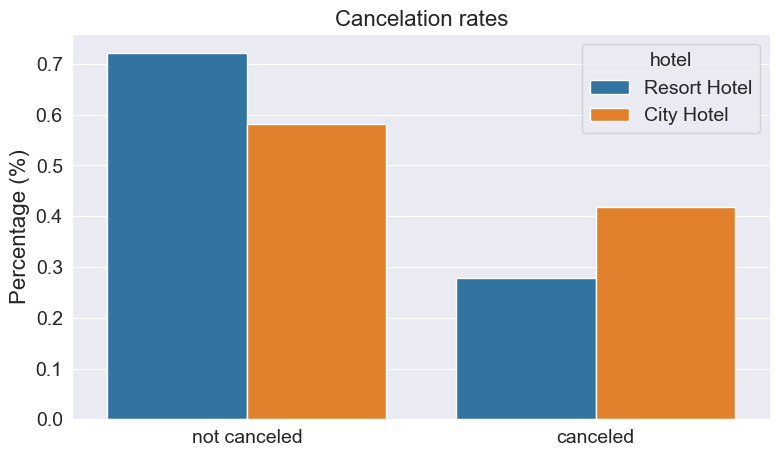

In [454]:
#visualize using bar chart
sns.barplot(x = 'is_canceled', y = 'cancel_rate', hue = 'hotel', data = cancel_full_df)

plt.title('Cancelation rates', fontsize = 16)
plt.xlabel('')
plt.ylabel('Percentage (%)', fontsize = 16)
plt.show();

- Guests tend to cancel on city hotels comparing to resort hotels.
- Resort hotels: Around 28% of bookings were canceled.
- City hotels: Approximately 32% of bookings were canceled, around 14% of chance higher than the cancelation of resort hotels .

## Asking and Answering Questions

We will ask some questions and try to answer them by visualizing the results using Matplotlib/Seaborn or computing them with Pandas. Hopefully to come up with some interesting insights of this dataset.


### Q1: What time of the year has the most number of differences between reserved and assigned room type? Is it related to the occupancy of accommadation?
We want to know whether there is a relationship between the difference in reserved/assigned room type and the occupancy of accomadation. Since one might think the higher the occupancy is, the higher chance there is for hotels making adjustments on assigning room types.  

In [455]:
#calculate monthly guests in percentage
monthly_guests_df = df.arrival_date_month.value_counts()

monthly_guests_df = monthly_guests_df.to_frame().reset_index()
monthly_guests_df['index'] = pd.Categorical(monthly_guests_df['index'], ordered_months)
monthly_guests_df = monthly_guests_df.sort_values('index')
monthly_guests = list(monthly_guests_df.arrival_date_month)
monthly_guests
monthly_guests = [(i/sum(monthly_guests))*100 for i in monthly_guests]

In [456]:
room_df = df[['arrival_date_month', 'reserved_room_type', 'assigned_room_type']]

room_diff_df = room_df[room_df.reserved_room_type != room_df.assigned_room_type]
room_diff = room_diff_df.arrival_date_month.value_counts()

In [457]:
#calculate room differences in percentage
room_diff = room_diff.to_frame().reset_index()
room_diff['index'] = pd.Categorical(room_diff['index'], ordered_months)
room_diff = room_diff.sort_values('index')

room_diff = list(room_diff.arrival_date_month)
room_diff = [(i/sum(room_diff))*100 for i in room_diff]

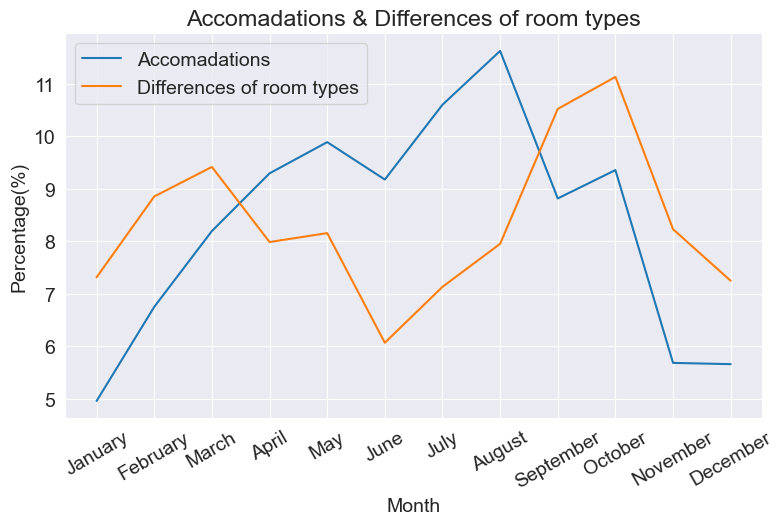

In [458]:
#visualize using line chart
sns.lineplot(x = ordered_months, y = monthly_guests, label = 'Accomadations')
sns.lineplot(x = ordered_months, y = room_diff, label = 'Differences of room types')

plt.title('Accomadations & Differences of room types')
plt.xlabel('Month')
plt.ylabel('Percentage(%)')
plt.legend()
plt.xticks(rotation = 30)
plt.show();

From the graph above, it is clear that in October, there is the highest chance of people getting different room types from what they reserved. However, the trend doesn't seem to be following any particular pattern, and not visually related to the accommadation occupancy.

### Q2: Are guests canceling bookings due to the difference in reserved and assigned room types?
Since it is fair and reasonable for guests to cancel their bookings due to not getting the room types they wanted in the first place, let's analyze how many people have really done that.

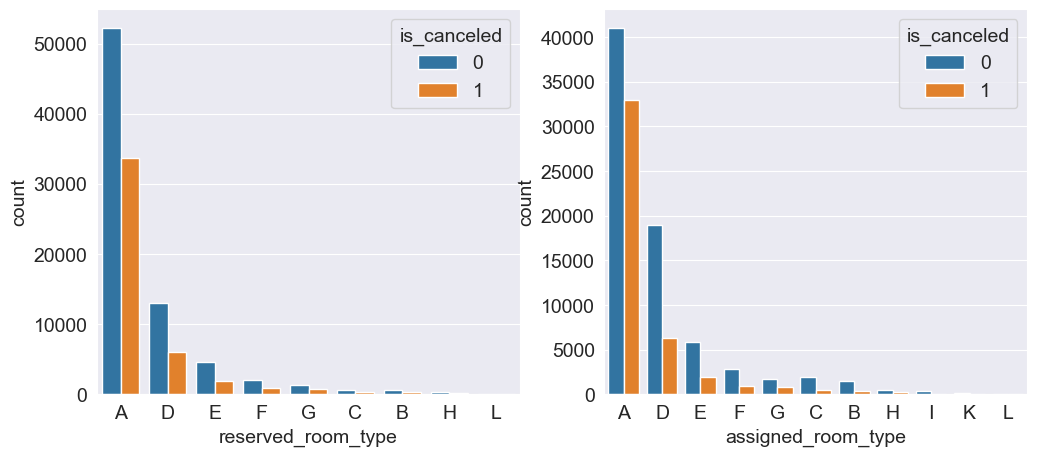

In [459]:
#visualize 'reserved_room_type' and 'assigned_room_type' cancelation using bar chart
fig, axes = plt.subplots( nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'reserved_room_type', hue = 'is_canceled', data = df, order = df['reserved_room_type'].value_counts(ascending = False).index, ax = axes[0])
sns.countplot(x = 'assigned_room_type', hue = 'is_canceled', data = df, order = df['assigned_room_type'].value_counts(ascending = False).index, ax = axes[1])
plt.show();

From the figures above, we visualize the types of room for both reserved and assigned rooms. Room A is the most popular, but also with the highest rate of cancalation, while room L is the least favorable ones.

In [460]:
#add additional column 'wanted_unwanted_room' to df
unwanted_room = np.where(df['reserved_room_type'] == df['assigned_room_type'], 'wanted', 'unwanted')
df['wanted_unwanted_room'] = unwanted_room

In [461]:
#calculate the percentage of cancelation of both wanted and unwanted rooms
wanted_percent = df[df.wanted_unwanted_room == 'wanted'][df.is_canceled == 1]['wanted_unwanted_room'].count()*100 / df[df.wanted_unwanted_room == 'wanted']['wanted_unwanted_room'].count()
unwanted_percent = df[df.wanted_unwanted_room == 'unwanted'][df.is_canceled == 1]['wanted_unwanted_room'].count()*100 / df[df.wanted_unwanted_room == 'unwanted']['wanted_unwanted_room'].count()

/var/folders/mf/4s6x4zmd069fb360bc_z45fh0000gn/T/ipykernel_23789/2471822054.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/mf/4s6x4zmd069fb360bc_z45fh0000gn/T/ipykernel_23789/2471822054.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



The cancelation rate of wanted room types is: 41.56%
The cancelation rate of unwanted room types is: 5.42%


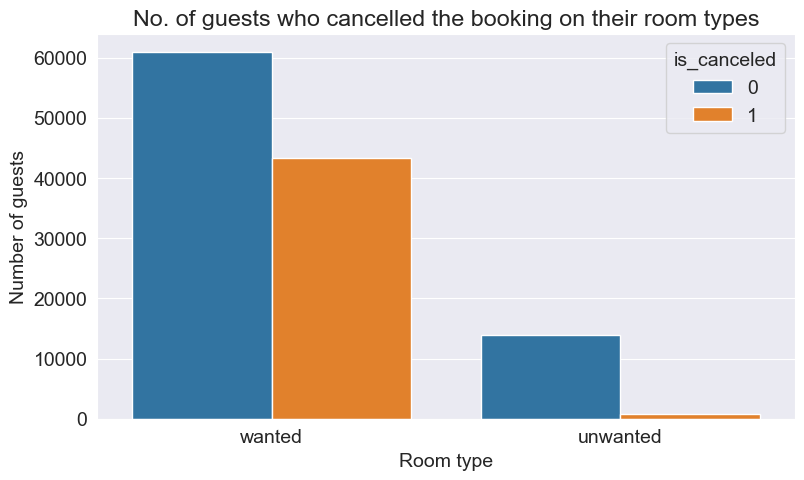

In [462]:
print(f'The cancelation rate of wanted room types is: {round(wanted_percent, 2)}%')
print(f'The cancelation rate of unwanted room types is: {round(unwanted_percent, 2)}%')

#visualize using bar chart
sns.countplot(x = 'wanted_unwanted_room', data = df, hue = 'is_canceled')
plt.title("No. of guests who cancelled the booking on their room types")
plt.xlabel('Room type')
plt.ylabel('Number of guests')
plt.show();

Well, the result is surprising and isn't what we expected to see. There is a significantly lower rate of cancelation in unwanted room types, while around 41.56% of guests cancel on wanted room types. 

### Q3: Do guests tend to bring children/babies to hotels in summer?
Summer breaks are usually the time for families to go on trips, so we want to know whether more guests bring their kids along to stay in hotels during these time of the year.


In [463]:
#add new column 'total_child'
df['total_child'] = df.children + df.babies
rh_df = df[df.hotel == 'Resort Hotel']
ch_df = df[df.hotel == 'City Hotel']

In [464]:
#sort df by ordered_months
rh_df['arrival_date_month'] = pd.Categorical(rh_df['arrival_date_month'], ordered_months)
ch_df['arrival_date_month'] = pd.Categorical(ch_df['arrival_date_month'], ordered_months)

/var/folders/mf/4s6x4zmd069fb360bc_z45fh0000gn/T/ipykernel_23789/1531541807.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/mf/4s6x4zmd069fb360bc_z45fh0000gn/T/ipykernel_23789/1531541807.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [465]:
#calculate the percentage of guests with children
rh_with_child_df = rh_df[rh_df.total_child != 0]
ch_with_child_df = ch_df[ch_df.total_child != 0]

rh_with_child_list = list(rh_with_child_df.groupby('arrival_date_month')['total_child'].count())
ch_with_child_list = list(ch_with_child_df.groupby('arrival_date_month')['total_child'].count())

rh_with_child = [(i/j)*100 for i, j in zip(rh_with_child_list , rh_total_child)]
ch_with_child = [(i/j)*100 for i, j in zip(ch_with_child_list , ch_total_child)]

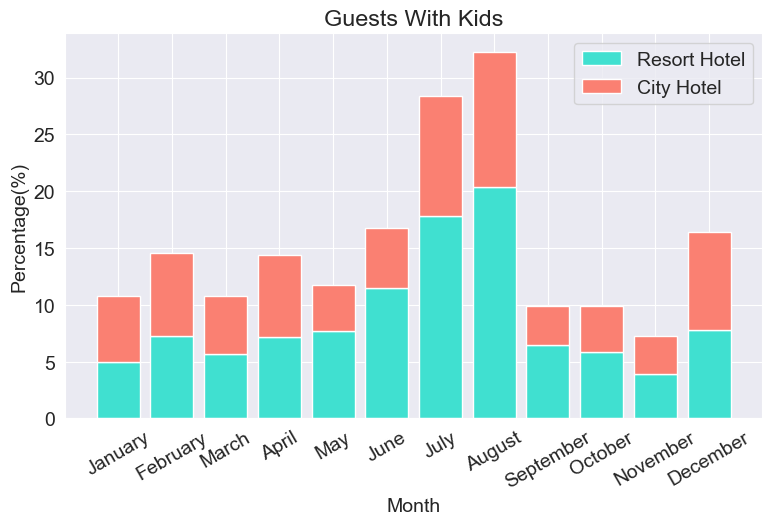

In [466]:
#visualize using bar chart
plt.bar(ordered_months, rh_with_child, color = 'turquoise')
plt.bar(ordered_months, ch_with_child, bottom = rh_with_child, color = 'salmon')

plt.title('Guests With Kids')
plt.xlabel('Month')
plt.ylabel('Percentage(%)')
plt.legend(['Resort Hotel', 'City Hotel'])
plt.xticks(rotation = 30)
plt.show();

From the graph above, July and August are the two months which the most guests bring their childern/babies along. It is reasonable since these are the months of summer vacation, and most of the guests are from the northen hemisphere. Hence, hotels can expect more guests with children during summer break.

### Q4: Is there a relationship between cancelation rate and popular dates of accomadation?
While it is an intuitive view that the more bookings hotels get, the more likey will guests cancel on the them. Hence, we want to verify if this is true or not.

In [467]:
cancel_df = df[['is_canceled', 'arrival_date_month']]
cancel_df.is_canceled.value_counts()

0    74872
1    44115
Name: is_canceled, dtype: int64

In [468]:
#sort and calculate percentage of cancelations
cancel_df['arrival_date_month'] = pd.Categorical(cancel_df['arrival_date_month'], ordered_months)

canceled_df = cancel_df[cancel_df.is_canceled != 0]
canceled = list(canceled_df.groupby('arrival_date_month')['is_canceled'].count())
canceled = [(i/sum(canceled))*100 for i in canceled]

/var/folders/mf/4s6x4zmd069fb360bc_z45fh0000gn/T/ipykernel_23789/2047514876.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



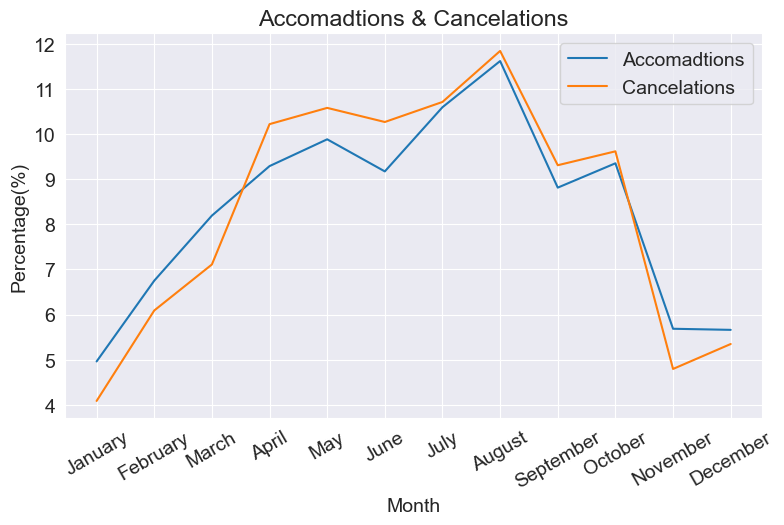

In [469]:
#visualizing using line chart
sns.lineplot(x = ordered_months, y = monthly_guests, label = 'Accomadtions')
sns.lineplot(x = ordered_months, y = canceled, label = 'Cancelations')
plt.title('Accomadtions & Cancelations')
plt.xlabel('Month')
plt.ylabel('Percentage(%)')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 30)
plt.show();

The figure above shows that the trend of cancelation follows that of accomadation, which means the more booking during a period of time, the more cancelation we will expect. Thus, a positive correlation exists between the two variables.

### Q5:  What are the most correlated features of cancelation?
This dataset can be used to train a model to predict whether there will be a cancelation or not, finding the correlated factor of cancelation can be helpful in training the model, so here we are going to explore the correlations with cancelation.

While only numerical variables can be calculated for correlated factors, we will use the **LabelEncoder** function from scikit-learn to transform object-type variables into numerics.

In [470]:
#transform non-numeric to numeric variables
labelencoder = LabelEncoder()

for col in df[['arrival_date_month', 'meal', 'country','market_segment','distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']]:
    df[col] = labelencoder.fit_transform(df[col])

df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_date_year,reservation_date_month,reservation_date_day,wanted_unwanted_room,total_child
0,Resort Hotel,0,342,2015,5,27,1,2015-07-01,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,NaN,NaN,0,2,0.0,0,0,1,2015-07-01,2015,7,1,wanted,0.0
1,Resort Hotel,0,737,2015,5,27,1,2015-07-01,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,NaN,NaN,0,2,0.0,0,0,1,2015-07-01,2015,7,1,wanted,0.0
2,Resort Hotel,0,7,2015,5,27,1,2015-07-01,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,NaN,NaN,0,2,75.0,0,0,1,2015-07-02,2015,7,2,unwanted,0.0
3,Resort Hotel,0,13,2015,5,27,1,2015-07-01,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,NaN,0,2,75.0,0,0,1,2015-07-02,2015,7,2,wanted,0.0
4,Resort Hotel,0,14,2015,5,27,1,2015-07-01,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,NaN,0,2,98.0,0,1,1,2015-07-03,2015,7,3,wanted,0.0


In [471]:
#define features
mat = ['is_canceled',
       'lead_time',
       'stays_in_weekend_nights',
       'stays_in_week_nights',
       'adults',
       'children',
       'babies',
       'meal',
       'country',
       'market_segment',
       'distribution_channel',
       'is_repeated_guest',
       'previous_cancellations',
       'previous_bookings_not_canceled',
       'reserved_room_type',
       'assigned_room_type',
       'deposit_type',
       'booking_changes',
       'days_in_waiting_list',
       'adr',
       'required_car_parking_spaces',
       'total_of_special_requests']

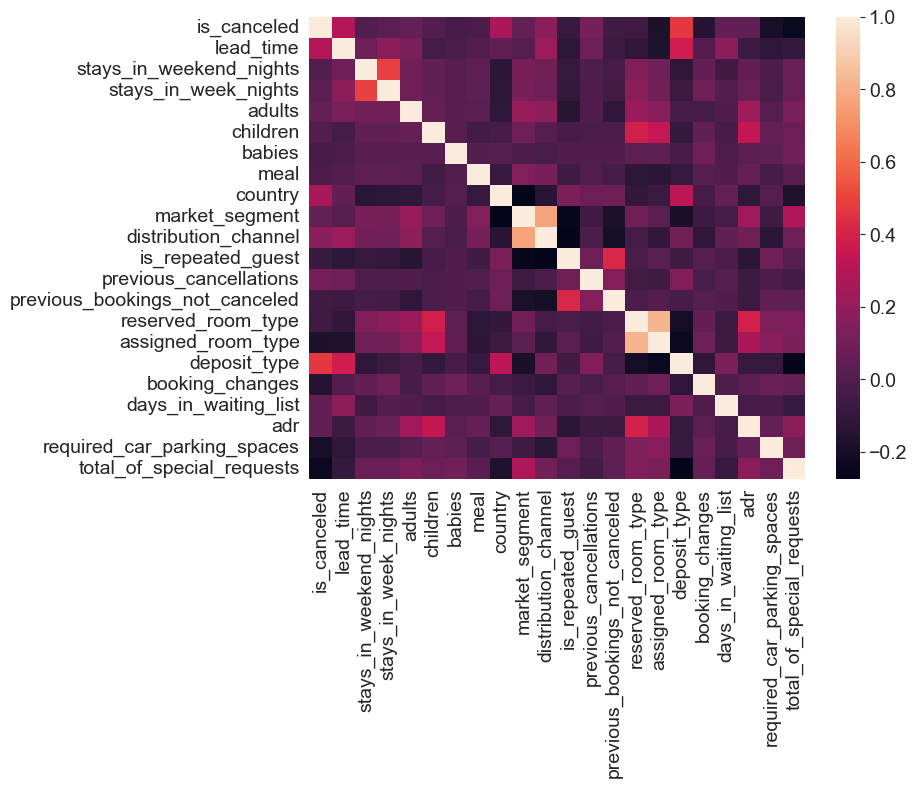

In [472]:
#plot the correlation map
plt.figure(figsize = (8, 6))
corr_mat = df[mat].corr()
sns.heatmap(corr_mat);

In [473]:
#list the correlated features with respect to 'is_canceled'
cancel_correlation = df.drop('reservation_status', axis = 1).corr(numeric_only = True)['is_canceled']
cancel_correlation.sort_values(ascending = False)[1:]

deposit_type                      0.469187
lead_time                         0.292983
country                           0.265026
distribution_channel              0.167791
previous_cancellations            0.110222
market_segment                    0.059326
adults                            0.058891
days_in_waiting_list              0.054357
adr                               0.046460
stays_in_week_nights              0.025348
arrival_date_year                 0.016450
arrival_date_week_number          0.008323
children                          0.004849
stays_in_weekend_nights          -0.001388
arrival_date_month               -0.001407
total_child                      -0.003183
arrival_date_day_of_month        -0.005878
meal                             -0.017134
company                          -0.023174
babies                           -0.032620
reservation_date_day             -0.033856
previous_bookings_not_canceled   -0.057413
reserved_room_type               -0.062293
customer_ty

- It seems that 'deposit_type' is most positive correlated variable of cancelation, since the deposit type such as no deposit or no refund can greatly affect people's flexability on their schedule.
- Lead time is one of the top impact factors of cancelation as well, and probably also because of its relation with the flexability of guests' schedules.
- It looks like 'total_of_special_requests' is the most negative correlated variable, because the more requests a guest make, the more they want to spend a good time and be more committed to the hotel.
- While the dates of arrival can barely provide us with information of their connection with cancelation.

In [474]:
import jovian

In [480]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sashalai007/zerotopandas-course-project" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/sashalai007/zerotopandas-course-project


'https://jovian.com/sashalai007/zerotopandas-course-project'

## Inferences and Conclusion

I hope this analysis and exploration can be helpful to anyone interested, especially hotel owners, to understand more about trends that guests follow, and what to expect in certain time of a year.

The followings are some of the inferences drawn from the analysis, and conclusions we have made by answering various questions:


1. Portugal is the country where the most guests are from.
2. Guests usually stay for 1, 2 or 7 nights in resort hotels, while those in city hotels tend to stay 2 or 3 nights.
3. Resort hotels are the most expensive in August, while May is most pricey for city hotels.
4. For both types of hotels, people either make reservations within a month or more than half a year beforehand.
5. Guests tend to cancel on city hotels than on resort hotels.
6. It seems like the number of guests getting different room types is not affected by the occupancy of accomadation.
7. It is sursprising to see that there is a significantly lower rate of cancelation in unwanted room types, which means guests don't really cancel on hotels due to not being assigned to the types of room they originally required.
8. It is true that guests are more likely to bring their kids along in July and August, since these are the months of summer vacation.
9. It obvious that the more bookings a hotel gets, the more cancelations they will expect.
10. Among the information given, 'deposit_type' is the most positive correlated feature, while 'total_of_special_requests' is the most negative correlated variable with cancelation.

## References and Future Work

What I hope to do is to build a machine learning model for prediction of cancelations on hotels with this dataset in the near future, since it provides us with tons of information I found useful during analyzing and exploring this dataset. 

The following are some of the resources that are helpful for completing this work and gave me different insights and views for EDA.
- Seaborn: https://seaborn.pydata.org/
- Matplotlib: https://matplotlib.org/
- Kaggle notebook: https://www.kaggle.com/code/marcuswingen/eda-of-bookings-and-ml-to-predict-cancelations/comments
- Kaggle notebook: https://www.kaggle.com/code/visheshsoni23/hotel-booking-cancellation/notebook


In [476]:
import jovian

In [478]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sashalai007/zerotopandas-course-project" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/sashalai007/zerotopandas-course-project


'https://jovian.com/sashalai007/zerotopandas-course-project'